In [3]:
#source code: https://meshlogic.github.io/posts/jupyter/curve-fitting/parametric-curve-fitting/

from numpy import *
from numpy.polynomial import polynomial as pl
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d.axes3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

In [4]:

import os


def read_xyz_file(filename):
    x_coordinates = []
    y_coordinates = []
    z_coordinates = []

    with open(filename, 'r') as file:
        for line in file:
            # Splitting the line by whitespace and converting values to float
            x, y, z = map(float, line.split())
            x_coordinates.append(x)
            y_coordinates.append(y)
            z_coordinates.append(z)

    return x_coordinates, y_coordinates, z_coordinates

In [5]:
#extracting phosphorous from the PDB file

def finddistance(x,y,z,x1,y1,z1):
    return math.sqrt((x-x1)**2 + (y-y1)**2 + (z-z1)**2)

def uniform_param(P):
    u = linspace(0, 1, len(P))
    return u
    
def chordlength_param(P):
    u = generate_param(P, alpha=1.0)
    return u
    
def centripetal_param(P):
    u = generate_param(P, alpha=0.5)
    return u
    
def generate_param(P, alpha):
    n = len(P)
    u = zeros(n)
    u_sum = 0
    for i in range(1,n):
        u_sum += linalg.norm(P[i,:]-P[i-1,:])**alpha
        u[i] = u_sum
    
    return u/max(u)

def find_min_gss(f, a, b, eps=1e-4):
    
    # Golden section: 1/phi = 2/(1+sqrt(5))
    R = 0.61803399
    
    # Num of needed iterations to get precision eps: log(eps/|b-a|)/log(R)
    n_iter = int(ceil(-2.0780869 * log(eps/abs(b-a))))
    c = b - (b-a)*R
    d = a + (b-a)*R

    for i in range(n_iter):
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b-a)*R
        d = a + (b-a)*R

    return (b+a)/2

def iterative_param(P, u, fxcoeff, fycoeff, fzcoeff, fig_ax):
    
    global iter_i, plt_color
    u_new = u.copy()
    f_u = zeros(3)

    #--- Calculate approx. error s(u) related to point P_i
    def calc_s(u):
        f_u[0] = pl.polyval(u, fxcoeff)
        f_u[1] = pl.polyval(u, fycoeff)
        f_u[2] = pl.polyval(u, fzcoeff)

        s_u = linalg.norm(P[i]-f_u)
        return s_u
    
    #--- Find new values u that locally minimising the approximation error (excl. fixed end-points)
    for i in range(1, len(u)-1):
        
        #--- Find new u_i minimising s(u_i) by Golden search method
        u_new[i] = find_min_gss(calc_s, u[i-1], u[i+1])
        
        #--- Sample some values bewteen u[i-1] and u[i+1] to plot graph
        u_samp = linspace(u[i-1], u[i+1], 25)
        
        x = pl.polyval(u_samp, fxcoeff)
        y = pl.polyval(u_samp, fycoeff)
        z = pl.polyval(u_samp, fzcoeff)

        residual = P[i] - array([x,y,z]).T
        s_u_samp = [linalg.norm(residual[j]) for j in range(len(u_samp))]
        
        #--- Plot error to given axes
        fig_ax.plot(u_samp, s_u_samp, color=plt_color[iter_i], alpha=plt_alpha)
        fig_ax.plot(u_new[i], calc_s(u_new[i]), 'o', color=plt_color[iter_i], alpha=plt_alpha)
        
    return u_new

f = open("coefficients.txt", "w")
directory = "x"
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        xs , ys, zs = read_xyz_file(filepath)
        print(len(zs))
        print(zs)
        print(len(ys))
        print(ys)
        print(len(xs))
        print(xs)

        middle_elementx = len(xs)//2

        endindex = middle_elementx
        if len(xs)%2 == 1 :
            distance1 = finddistance(xs[middle_elementx], ys[middle_elementx], zs[middle_elementx], xs[middle_elementx-1], ys[middle_elementx-1], zs[middle_elementx-1])
            distance2 = finddistance(xs[middle_elementx], ys[middle_elementx], zs[middle_elementx], xs[middle_elementx+1], ys[middle_elementx+1], zs[middle_elementx+1])
            if distance1<distance2:
                endindex = endindex+1
        
        
        #obtaining the coordinates for phosphorous and splitting them as necessary        
        x = xs[:endindex]
        print(x)
        print(len(x))
        y = ys[:endindex]
        print(y)
        print(len(y))
        z = zs[:endindex]
        print(z)
        print(len(z))
        x1 = xs[endindex:]
        print(x1)
        print(len(x1))
        y1 = ys[endindex:]
        print(y1)
        print(len(y1))
        z1 = zs[endindex:]
        print(z1)
        print(len(z1))
        
        %matplotlib inline

        #-------------------------------------------------------------------------------
        # Options for the approximation method
        #-------------------------------------------------------------------------------
        polydeg = 9 # Degree of polygons of parametric curve
        n = len(P)
        n1 = len(P1)
        w1 = ones(n1)
        w = ones(n)           # Set weights for knot points
        w[0] = w[-1] = 1e6
        max_iter = 20         # Max. number of iterations
        eps = 1e-3
        plt_alpha = 0.6
        plt_color = cm.rainbow(linspace(1,0,max_iter))

        #-------------------------------------------------------------------------------
        # Init variables
        #-------------------------------------------------------------------------------
        f_u = zeros([n,3])
        uu = linspace(0,1,100)
        f_uu = zeros([len(uu),3])
        S_hist = []

        #-------------------------------------------------------------------------------
        # Init figures
        #-------------------------------------------------------------------------------
        fig = figure(figsize=(15,15))
        figshape = (3,3)
        ax = [None]*5
        ax[0] = subplot2grid(figshape, loc=(0,0))
        ax[1] = subplot2grid(figshape, loc=(0,1))
        ax[2] = subplot2grid(figshape, loc=(0,2))
        ax[3] = subplot2grid(figshape, loc=(1,0), colspan=3)
        ax[4] = subplot2grid(figshape, loc=(2,0), colspan=2)
        i = 0
        #ax[i].plot(P_gen[:,0], P_gen[:,1], 'y-', lw=2 ,label='Generating Curve')
        ax[i].plot(P[:,0], P[:,1], 'ks', label='Knot points P')
        ax[i].set_title('View X-Y')
        ax[i].set_xlabel('x'); ax[i].set_ylabel('y');
        ax[i].set_aspect('equal', 'datalim')
        ax[i].margins(.1, .1)
        ax[i].grid()
        i = 1
        #ax[i].plot(P_gen[:,0], P_gen[:,2], 'y-', lw=2 ,label='Generating Curve')
        ax[i].plot(P[:,0], P[:,2], 'ks', label='Knot points P')
        ax[i].set_title('View X-Z')
        ax[i].set_xlabel('x'); ax[i].set_ylabel('z'); 
        ax[i].set_aspect('equal', 'datalim')
        ax[i].margins(.1, .1)
        ax[i].grid()
        i = 2
        #ax[i].plot(P_gen[:,1], P_gen[:,2], 'y-', lw=2 ,label='Generating Curve')
        ax[i].plot(P[:,1], P[:,2], 'ks', label='Knot points P')
        ax[i].set_title('View Y-Z')
        ax[i].set_xlabel('y'); ax[i].set_ylabel('z'); 
        ax[i].set_aspect('equal', 'datalim')
        ax[i].margins(.1, .1)
        ax[i].legend()
        ax[i].grid()
        i = 3
        ax[i].set_title('Local minimization of approximation error $s(u_i)$ for each $u_i$')
        ax[i].set_xlabel('$u_i$'); ax[i].set_ylabel('$s(u_i)$');
        ax[i].grid()
        i = 4
        ax[i].set_title('Approximation error $S$ for each iteration')
        ax[i].set_xlabel('Iteration'); ax[i].set_ylabel('$S$');
        ax[i].grid()

        #-------------------------------------------------------------------------------
        # Compute the iterative approximation
        #-------------------------------------------------------------------------------
        for iter_i in range(max_iter):

            #--- Initial or iterative parametrization
            if iter_i == 0:
                #u = uniform_param(P)
                #u = chordlength_param(P)
                u = centripetal_param(P)
                u1 = centripetal_param(P1)
            else:
                u = iterative_param(P, u, fxcoeff, fycoeff, fzcoeff, ax[3])
                u1 = iterative_param(P1, u1, fxcoeff, fycoeff, fzcoeff, ax[3])

            #--- Compute polynomial approximations and get their coefficients
            fxcoeff = pl.polyfit(u, P[:,0], polydeg, w=w)
            fycoeff = pl.polyfit(u, P[:,1], polydeg, w=w)
            fzcoeff = pl.polyfit(u, P[:,2], polydeg, w=w)
            fx1coeff = pl.polyfit(u1, P1[:,0], polydeg, w=w1)
            fy1coeff = pl.polyfit(u1, P1[:,1], polydeg, w=w1)
            fz1coeff = pl.polyfit(u1, P1[:,2], polydeg, w=w1)

            #--- Calculate function values f(u)=(fx(u),fy(u),fz(u))
            f_u[:,0] = pl.polyval(u, fxcoeff)
            f_u[:,1] = pl.polyval(u, fycoeff)
            f_u[:,2] = pl.polyval(u, fzcoeff)

            #--- Calculate fine values for ploting
            f_uu[:,0] = pl.polyval(uu, fxcoeff)
            f_uu[:,1] = pl.polyval(uu, fycoeff)
            f_uu[:,2] = pl.polyval(uu, fzcoeff)

            #--- Print plots
            hp = ax[0].plot(f_uu[:,0], f_uu[:,1], color=plt_color[iter_i], alpha=plt_alpha)
            hp = ax[1].plot(f_uu[:,0], f_uu[:,2], color=plt_color[iter_i], alpha=plt_alpha)
            hp = ax[2].plot(f_uu[:,1], f_uu[:,2], color=plt_color[iter_i], alpha=plt_alpha)

            #--- Errors of init parametrization
            if iter_i == 0:
                for i in range(1, len(u)-1):
                    ax[3].plot(u[i], linalg.norm(P[i]-f_u[i]), 'o', color=plt_color[iter_i], alpha=plt_alpha)

            #--- Total error of approximation S for iteration i
            S = 0
            for j in range(len(u)):
                S += w[j] * linalg.norm(P[j] - f_u[j])

            #--- Add bar of approx. error
            ax[4].bar(iter_i, S, width=0.6, color=plt_color[iter_i], alpha=plt_alpha)
            S_hist.append(S)

            #--- Stop iterating if change in error is lower than desired condition
            if iter_i > 0:
                S_change = S_hist[iter_i-1] / S_hist[iter_i] - 1
                #print('iteration:%3i, approx.error: %.4f (%f)' % (iter_i, S_hist[iter_i], S_change))
                if S_change < eps:
                    break
        print(fxcoeff)
        print(fycoeff)
        print(fzcoeff)
        print(fx1coeff)
        print(fy1coeff)
        print(fz1coeff)
        f = open("coefficients.txt", "a")
        f.write(filename)
        f.write(fxcoeff)
        f.write(fycoeff)
        f.write(fzcoeff)
        f.write(fx1coeff)
        f.write(fy1coeff)
        f.write(fz1coeff)
        f.close()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'x'

In [16]:
#determining the total distance covered by the connection between the knot points and the middle distance

distance_list = []
total_distance = 0

for x_coord in x:
    x_temp = float(x_coord)
    y_temp = float(y[x.index(x_coord)])
    z_temp = float(z[x.index(x_coord)])
    
    if (x.index(x_coord) + 1) != len(x):
        x_temp1 = float(x[x.index(x_coord) + 1])
        y_temp1 = float(y[x.index(x_coord) + 1])
        z_temp1 = float(z[x.index(x_coord) + 1])

        distance = ((x_temp1 - x_temp)**2 + (y_temp1 - y_temp)**2 + (z_temp1 - z_temp)**2)**0.5
        distance_list.append(distance)


for distance in distance_list:
    total_distance += distance

half_length = total_distance/2
print(half_length)

distance_from_closest_point = half_length
point_1x = 0
point_1y = 0
point_1z = 0
point_2x = 0
point_2y = 0
point_2z = 0

for distance in distance_list:
    distance_from_closest_point -= distance
    if distance_from_closest_point < 0:
        distance_from_closest_point += distance
        point_1x = float(x[distance_list.index(distance)])
        point_1y = float(y[distance_list.index(distance)])
        point_1z = float(z[distance_list.index(distance)])
        point_2x = float(x[distance_list.index(distance) + 1])
        point_2y = float(y[distance_list.index(distance) + 1])
        point_2z = float(z[distance_list.index(distance) + 1])
        break
    else:
        continue

print(distance_from_closest_point)
print("(" + str(point_1x) + "," + str(point_1y) + "," + str(point_1z) + "), (" + str(point_2x) + "," + str(point_2y) + "," + str(point_2z) + ")")

distance_between_point = ((point_2x - point_1x)**2 + (point_2y - point_1y)**2 + (point_2z - point_1z)**2)**0.5
print(distance_between_point)

r = distance_from_closest_point/distance_between_point
print(r)

dx = point_2x-point_1x
rdx = abs(r * dx)
mid_x = rdx + point_1x

dy = point_2y-point_1y
rdy = abs(r * dy)
mid_y = rdy + point_1y

dz = point_2z-point_1z
rdz = abs(r * dz)
mid_z = rdz + point_1z
print("(" + str(mid_x) + "," + str(mid_y) + "," + str(mid_z) + ")")


58.87011269198386
5.049421149998744
(49.202,30.62,40.075), (48.536,36.267,37.238)
6.35458369997595
0.7946108491761394
(49.7312108255513,35.107167465297664,42.32931097911271)


In [18]:
distance_list1 = []
total_distance1 = 0

for x_coord in x1:
    x_temp = float(x_coord)
    y_temp = float(y1[x1.index(x_coord)])
    z_temp = float(z1[x1.index(x_coord)])

    if (x1.index(x_coord) + 1) != len(x1):
        x_temp1 = float(x1[x1.index(x_coord) + 1])
        y_temp1 = float(y1[x1.index(x_coord) + 1])
        z_temp1 = float(z1[x1.index(x_coord) + 1])

        distance = ((x_temp1 - x_temp)**2 + (y_temp1 - y_temp)**2 + (z_temp1 - z_temp)**2)**0.5
        distance_list1.append(distance)

for distance in distance_list1:
    total_distance1 += distance

half_length1 = total_distance1/2
print(half_length1)

distance_from_closest_point1 = half_length1
point_1x1 = 0
point_1y1 = 0
point_1z1 = 0
point_2x1 = 0
point_2y1 = 0
point_2z1 = 0

for distance in distance_list1:
    distance_from_closest_point1 -= distance
    if distance_from_closest_point1 < 0:
        distance_from_closest_point1 += distance
        point_1x1 = float(x1[distance_list1.index(distance)])
        point_1y1 = float(y1[distance_list1.index(distance)])
        point_1z1 = float(z1[distance_list1.index(distance)])
        point_2x1 = float(x1[distance_list1.index(distance) + 1])
        point_2y1 = float(y1[distance_list1.index(distance) + 1])
        point_2z1 = float(z1[distance_list1.index(distance) + 1])
        break
    else:
        continue

print(distance_from_closest_point1)
print("(" + str(point_1x1) + "," + str(point_1y1) + "," + str(point_1z1) + "), (" + str(point_2x1) + "," + str(point_2y1) + "," + str(point_2z1) + ")")

distance_between_point1 = ((point_2x1 - point_1x1)**2 + (point_2y1 - point_1y1)**2 + (point_2z1 - point_1z1)**2)**0.5
print(distance_between_point1)

r1 = distance_from_closest_point1/distance_between_point1
print(r1)

dx1 = point_2x1-point_1x1
rdx1 = abs(r * dx1)
mid_x1 = rdx1 + point_1x1

dy1 = point_2y1-point_1y1
rdy1 = abs(r * dy1)
mid_y1 = rdy1 + point_1y1

dz1 = point_2z1-point_1z1
rdz1 = abs(r * dz1)
mid_z1 = rdz1 + point_1z1
print("(" + str(mid_x1) + "," + str(mid_y1) + "," + str(mid_z1) + ")")

70.82789302623222
2.192555146416944
(34.42,39.222,52.916), (32.818,38.451,46.694)
6.471022253091079
0.3388267047558991
(35.69296658038018,39.834644964714805,57.86006870357393)


In [19]:
final_mid_x = mid_x + mid_x1
final_mid_x *= 0.5
final_mid_y = mid_y + mid_y1
final_mid_y *= 0.5
final_mid_z = mid_z + mid_z1
final_mid_z *= 0.5

print("(" + str(final_mid_x) + "," + str(final_mid_y) + "," + str(final_mid_z) + ")")

(42.712088702965744,37.47090621500624,50.094689841343325)


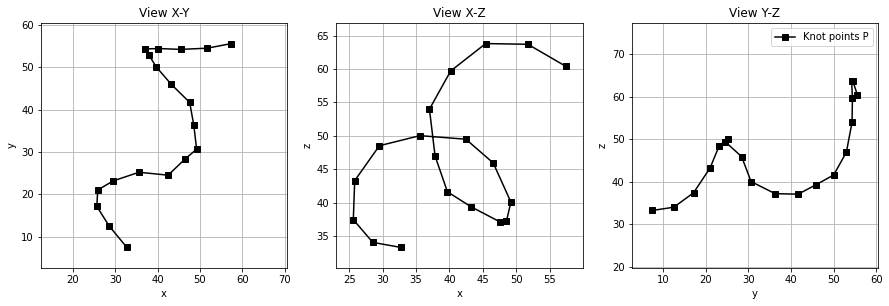

In [20]:
%matplotlib inline

#--- Generate and store knot points in matrix P



P = zeros([len(x),3])
P[:,0] = x
P[:,1] = y
P[:,2] = z

P1 = zeros([len(x1),3])
P1[:,0] = x1
P1[:,1] = y1
P1[:,2] = z1

#--- Add some random noise to knot points excl. end-points
#P[range(1,n-1),:] += random.normal(size=(n-2,3)) * 0.02

#--- Calculate some points to display the generating curve
#x_gen = linspace(-2, 2, 50)
#y_gen, z_gen = generate_yz_coords(x_gen)
#P_gen = zeros([len(x_gen),3])
#P_gen[:,0] = x_gen
#P_gen[:,1] = y_gen
#P_gen[:,2] = z_gen

#--- Plot
f, ax = subplots(1, 3, figsize=(15,4.5))
i = 0
#ax[i].plot(P_gen[:,0], P_gen[:,1], 'y-', lw=2 ,label='Generating Curve')
ax[i].plot(P[:,0], P[:,1], 'ks-', label='Knot points P')
ax[i].set_title('View X-Y')
ax[i].set_xlabel('x'); ax[i].set_ylabel('y');
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()
i = 1
#ax[i].plot(P_gen[:,0], P_gen[:,2], 'y-', lw=2 ,label='Generating Curve')
ax[i].plot(P[:,0], P[:,2], 'ks-', label='Knot points P')
ax[i].set_title('View X-Z')
ax[i].set_xlabel('x'); ax[i].set_ylabel('z'); 
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()
i = 2
#ax[i].plot(P_gen[:,1], P_gen[:,2], 'y-', lw=2 ,label='Generating Curve')
ax[i].plot(P[:,1], P[:,2], 'ks-', label='Knot points P')
ax[i].set_title('View Y-Z')
ax[i].set_xlabel('y'); ax[i].set_ylabel('z'); 
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].legend()
ax[i].grid()

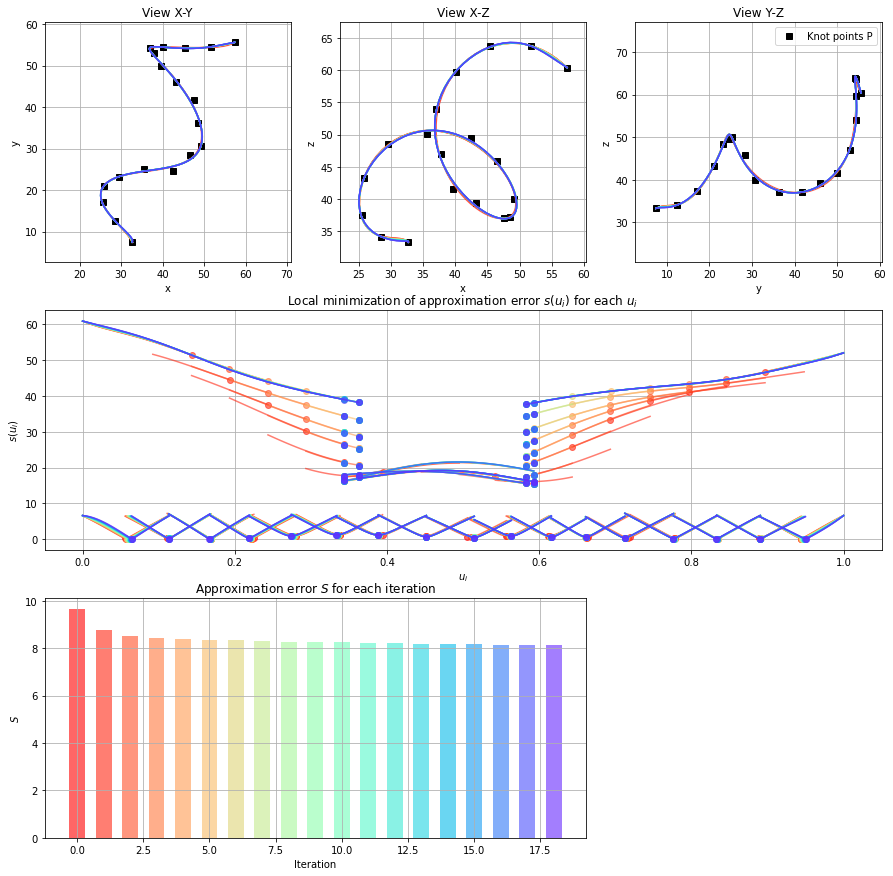

In [30]:
f = open("demofile2.txt", "a")
print(fxcoeff)
print(fycoeff)
print(fzcoeff)
print(fx1coeff)
print(fy1coeff)
print(fz1coeff)

[ 3.27150000e+01  3.65288363e+01 -2.95808556e+03  2.89450825e+04
 -1.23390667e+05  3.02218461e+05 -4.60104650e+05  4.28644755e+05
 -2.22073051e+05  4.87062973e+04]
[ 7.42200000e+00  4.14938124e+01  8.60120074e+02 -5.19996502e+03
  8.42465157e+03  8.67053051e+03 -4.17721755e+04  4.92943749e+04
 -2.48191659e+04  4.54831764e+03]
[ 3.32940000e+01  2.04729533e+01 -9.96050956e+02  1.95512039e+04
 -1.14425931e+05  3.20625314e+05 -4.98878173e+05  4.45753013e+05
 -2.15410670e+05  4.37879449e+04]
[ 4.84569672e+01  1.24244224e+09 -1.87706971e+10  1.20673202e+11
 -4.29785742e+11  9.23860309e+11 -1.22106112e+12  9.62100806e+11
 -4.08803992e+11  7.05447919e+10]
[ 4.44237714e+01  1.19094148e+10 -2.02981669e+11  1.49304711e+12
 -6.18476789e+12  1.57648314e+13 -2.52920775e+13  2.49078911e+13
 -1.37439165e+13  3.24606455e+12]
[ 3.74570921e+01 -4.75422040e+09  8.08591832e+10 -5.93490440e+11
  2.45315481e+12 -6.23960108e+12  9.98928512e+12 -9.81743757e+12
  5.40661267e+12 -1.27462847e+12]


In [31]:
#%matplotlib

#-------------------------------------------------------------------------------
# - Make axes of 3D plot to have equal scales
# - This is a workaround to Matplotlib's set_aspect('equal') and axis('equal')
#   which were not working for 3D
#-------------------------------------------------------------------------------
#def set_axes_equal_3d(ax):
#    limits = array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()])
#    spans = abs(limits[:,0] - limits[:,1])
#    centers = mean(limits, axis=1)
#    radius = 0.5 * max(spans)
#    ax.set_xlim3d([centers[0]-radius, centers[0]+radius])
#    ax.set_ylim3d([centers[1]-radius, centers[1]+radius])
#    ax.set_zlim3d([centers[2]-radius, centers[2]+radius])

#--- 3D Plot
#fig = figure(figsize=(14,10))
#ax = fig.add_subplot(1,1,1,projection='3d')

#ax.plot(*P_gen.T, color='y', lw=4, label='Generating Curve')
#ax.scatter(mid_x1, mid_y1, mid_z1, c = "red")
#ax.scatter(final_mid_x, final_mid_y, final_mid_z, c = "green")
#ax.plot(*P.T, color='k', ls='--', marker='s', label='Knot points P')
#ax.plot(*f_uu.T, color='b', ls='-', lw=3, label='Approximation Curve')
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#ax.legend()
#ax.set_aspect('equal', 'datalim')
#set_axes_equal_3d(ax)